### Imports

In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist, plot_altair
from impedance import preprocessing
from impedance.models.circuits import Randles, CustomCircuit

#### Get Data

In [2]:
frequencies_uncropped, Z_uncropped = preprocessing.readCSV('/Users/laurenfrank/impedance.py/data/exampleData.csv')

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies_uncropped, Z_uncropped)

### Testing Rpore Parameters ---------

#### Solution Where it Works!

In [7]:
from impedance.models.circuits.elements import get_pore_params,get_pore_params2
print("Reference used: https://stackoverflow.com/questions/8739227/how-to-solve-a-pair-of-nonlinear-equations-using-python")
print()
print('Analytical Method in Sympy: A = 100, B = 25,C = 34, D = 20')
print('------------------------------------------------------')
test_analytical(100,25,34,2)
print()
print('Numerical Method using Fsolve in Scipy: A = 100, B = 25,C = 34, D = 20')
print('------------------------------------------------------')
test_fsolve(100,25,34,2)

Reference used: https://stackoverflow.com/questions/8739227/how-to-solve-a-pair-of-nonlinear-equations-using-python

Analytical Method in Sympy: A = 100, B = 25,C = 34, D = 20
------------------------------------------------------
Expected A is (100): 100.000000000000 (error: 0%)
Expected B is (25): 25.0000000000000 (error: 0%)
Excpected a is (34): 34 (error: 0%)
Expected b is (2): 2 (error: 0%)
Found Parameters:
R1: 14.0877081724073
R2 (Rpore): 110.912291827593
Rct: 3.67647058823529
Cdl: 0.0160000000000000

Expected A is (100): 100.000000000000 (error: 0%)
Expected B is (25): 25.0000000000000 (error: 0%)
Excpected a is (34): 34 (error: 0%)
Expected b is (2): 2 (error: 0%)
Found Parameters:
R1: 110.912291827593
R2 (Rpore): 14.0877081724073
Rct: 3.67647058823529
Cdl: 0.0160000000000000


Numerical Method using Fsolve in Scipy: A = 100, B = 25,C = 34, D = 20
------------------------------------------------------
Expected A is (100): 100.00000000000172 (error: 1.7195134205394424e-12%)
Exp

#### Solution where it fails!

In [8]:
print('Analytical Method in Sympy: A = 10, B = 25,C = 0.01, D = 20')
print('------------------------------------------------------')
test_analytical(10,25,0.01,20)
print('Numerical Method using Fsolve in Scipy: A = 10, B = 25,C = 0.01, D = 20')
print('------------------------------------------------------')
test_fsolve(10,25,0.01,20)

Analytical Method in Sympy: A = 10, B = 25,C = 0.01, D = 20
------------------------------------------------------
Expected A is (10): 10.0 + 0.e-19*I (error: 0.e-18*I%)
Expected B is (25): 25.0000000000000 (error: 0%)
Excpected a is (0.01): 0.0100000000000000 (error: 0%)
Expected b is (20): 20.0000000000000 (error: 0%)
Found Parameters:
R1: 17.5 - 11.4564392373896*I
R2 (Rpore): 17.5 + 11.4564392373896*I
Rct: 3500.00000000000
Cdl: 0.571428571428571

Expected A is (10): 10.0 + 0.e-19*I (error: 0.e-18*I%)
Expected B is (25): 25.0000000000000 (error: 0%)
Excpected a is (0.01): 0.0100000000000000 (error: 0%)
Expected b is (20): 20.0000000000000 (error: 0%)
Found Parameters:
R1: 17.5 + 11.4564392373896*I
R2 (Rpore): 17.5 - 11.4564392373896*I
Rct: 3500.00000000000
Cdl: 0.571428571428571

Numerical Method using Fsolve in Scipy: A = 10, B = 25,C = 0.01, D = 20
------------------------------------------------------
Expected A is (10): 17.342980569176685 (error: 73.42980569176684%)
Expected B is

/var/folders/6l/z6x890s133g488rww9gwhhrc0000gn/T/ipykernel_88792/3358842199.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  R1,R2,Rct,Cdl =  fsolve(equations, (1, 1, 1, 1))


#### The analytical method finds a complex solution that somehow evaluates close to the input parameters, and the numerical solution finds real values but they all have a large error... Overall, this will cause issues if implemented into impedance.py. Maybe a work-around is by adding in error messages saying initial guess is too far off (if you expect that there should be a real solution) or that the porous model does not support the data? I am not sure if these are the cases though.

## Testing Circuit Elements for Now using the Fsolve Method for Woring Data

#### TDS

/Users/laurenfrank/impedance.py/impedance/models/circuits/circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


Text(0.5, 0.98, 'Fsolve Using A = 100, B = 25,C = 34, D = 20 ==> Finds R1/R2 = 14.1/110.9, Rct = 3.7, Cdl = 0.016')

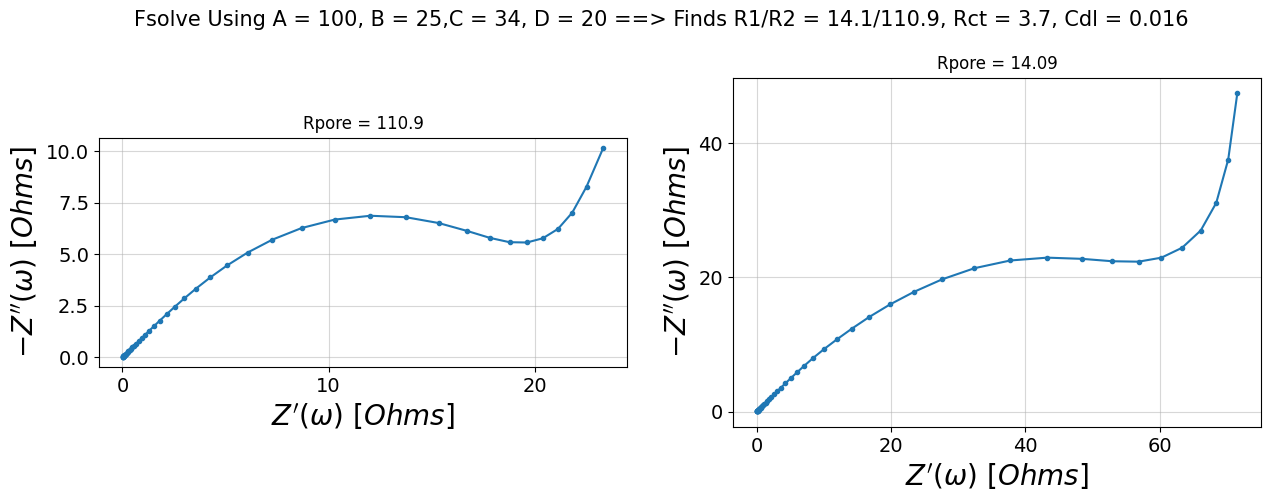

In [3]:
customConstantCircuit = CustomCircuit(initial_guess=[0, 100,25,34,20, 10, 100], #TDSS element is hard coded to use first solution of fsolve for these exact inputs
                                      circuit='R_0-TDSS_0')
customConstantCircuit2 = CustomCircuit(initial_guess=[0, 100,25,34,20, 10, 100], #TDS element uses the second solution of fsolve for any inputs
                                      circuit='R_0-TDS_0')

f_pred = np.logspace(5,-2)
customElementCircuit_fit = customConstantCircuit.predict(f_pred)
customElementCircuit_fit2 = customConstantCircuit2.predict(f_pred)

fig,ax = plt.subplots(1,2,figsize = (15,5))
plot_nyquist(customElementCircuit_fit,ax = ax[1])
plot_nyquist(customElementCircuit_fit2,ax = ax[0])
ax[0].set_title("Rpore = 110.9")
ax[1].set_title("Rpore = 14.09")
fig.suptitle('Fsolve Using A = 100, B = 25,C = 34, D = 20 ==> Finds R1/R2 = 14.1/110.9, Rct = 3.7, Cdl = 0.016', fontsize = 15)

### So you do indeed get different options, but these would hopefully get sorted out through the fitting algorithm in impedance.py as it would keep finding better A, B, a, and b values that optimize the fit using just the one solution. Otherwise, in theory, there could be a way where you feed all the solutions from fsolve to the fitting step and returns the one with minimum error - however, this would be an x(# of solutions) computational cost from just fitting with one set of paramaters!!!

### Overall, this same comparison was repeated for the other porous models.

### TDC

In [ ]:
#TODO: STILL NEED TO FINISH ALONG WITH TDP
customConstantCircuit = CustomCircuit(initial_guess=[0, 100,25,34,20, 10, 100], #TDSS element is hard coded to use first solution of fsolve for these exact inputs
                                      circuit='R_0-TDCC_0')
customConstantCircuit2 = CustomCircuit(initial_guess=[0, 100,25,34,20, 10, 100], #TDS element uses the second solution of fsolve for any inputs
                                      circuit='R_0-TDC_0')

f_pred = np.logspace(5,-2)
customElementCircuit_fit = customConstantCircuit.predict(f_pred)
customElementCircuit_fit2 = customConstantCircuit2.predict(f_pred)

fig,ax = plt.subplots(1,2,figsize = (15,5))
plot_nyquist(customElementCircuit_fit,ax = ax[0])
plot_nyquist(customElementCircuit_fit2,ax = ax[1])
ax[0].set_title("Rpore = 110.9")
ax[1].set_title("Rpore = 14.09")
fig.suptitle('Fsolve Using A = 100, B = 25,C = 34, D = 20 ==> Finds R1/R2 = 14.1/110.9, Rct = 3.7, Cdl = 0.016', fontsize = 15)

# Testing Equation Solvers

In [4]:
from scipy.optimize import fsolve
from math import exp
def test_fsolve(A,B,a,b):
    def equations(vars):
        R1, R2, Rct, Cdl = vars
        eq1 = ((R1**2+R2**2) / (R1+R2)) - A
        eq2 = ((2*R1*R2)/(R1+R2)) - B
        eq3 = ((R1+R2)/Rct) - a
        eq4 = (Cdl*(R1+R2)) - b
        return [eq1, eq2, eq3, eq4]

    R1,R2,Rct,Cdl =  fsolve(equations, (1, 1, 1, 1))
    print(f'Expected A is ({A}): {((R1**2+R2**2) / (R1+R2))} (error: {((((R1**2+R2**2) / (R1+R2)))-A)/A*100}%)')
    print(f'Expected B is ({B}): {(2*R1*R2)/(R1+R2)} (error: {(((2*R1*R2)/(R1+R2))-B)/B*100}%)')
    print(f'Expected a is ({a}): {((R1+R2)/Rct)} (error: {((((R1+R2)/Rct))-a)/a*100}%)')
    print(f'Expected b is ({b}): {(Cdl*(R1+R2))} (error: {(((Cdl*(R1+R2)))-b)/b*100}%)')

    print("Found Parameters:")
    print(f"R1: {R1}")
    print(f"R2: {R2}")
    print(f"Rct: {Rct}")
    print(f"Cdl: {Cdl}")



In [6]:
#Analytical
from sympy import symbols,solve,Eq,evalf

def test_analytical(A,B,a,b):
    R1, R2, Rct, Cdl = symbols('R1, R2, Rct, Cdl')
    eq1 = Eq((R1**2+R2**2) / (R1+R2), A)
    eq2 = Eq((2*R1*R2)/(R1+R2), B)
    eq3 = Eq((R1+R2)/Rct,a)
    eq4 = Eq(Cdl*(R1+R2),b)

    sols = solve([eq1, eq2, eq3, eq4], [R1,R2,Rct,Cdl], real = True)

    for sol in sols:
        R1,R2,Rct,Cdl = sol[0],sol[1],sol[2],sol[3]
        print(f'Expected A is ({A}): {((R1**2+R2**2) / (R1+R2)).evalf()} (error: {((((R1**2+R2**2) / (R1+R2)).evalf())-A)/A*100}%)')
        print(f'Expected B is ({B}): {((2*R1*R2)/(R1+R2)).evalf()} (error: {((((2*R1*R2)/(R1+R2)).evalf())-B)/B*100}%)')
        print(f'Excpected a is ({a}): {((R1+R2)/Rct)} (error: {((((R1+R2)/Rct))-a)/a*100}%)')
        print(f'Expected b is ({b}): {(Cdl*(R1+R2))} (error: {(((Cdl*(R1+R2)))-b)/b*100}%)')
        print("Found Parameters:")
        print(f"R1: {R1.evalf()}")
        print(f"R2 (Rpore): {R2.evalf()}")
        print(f"Rct: {Rct.evalf()}")
        print(f"Cdl: {Cdl.evalf()}")
        print()

In [13]:
from scipy.optimize import minimize
import numpy as np

# Define objective function
A,B,a,b = 10,25,0.01,20
def objective_function(x):
    R1, R2, Rct, Cdl = x
    return ((R1**2 + R2**2) / (R1 + R2) - A)**2 + \
           ((2 * R1 * R2) / (R1 + R2) - B)**2 + \
           ((R1 + R2) / Rct - a)**2 + \
           (Cdl * (R1 + R2) - b)**2

# Initial guess
initial_guess = [1, 1, 1, 1]

# Bounds for variables (optional)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Perform optimization
result = minimize(objective_function, initial_guess, bounds=bounds)

# Extract results
R1, R2, Rct, Cdl = result.x

print(f'Expected A is ({A}): {((R1**2+R2**2) / (R1+R2))}')
print(f'Expected B is ({B}): {(2*R1*R2)/(R1+R2)}')
print(f'Expected a is ({a}): {((R1+R2)/Rct)}')
print(f'Expected b is ({b}): {(Cdl*(R1+R2))}')

# Print the optimal solution
print("Found Parameters:")
print(f"R1: {R1}")
print(f"R2: {R2}")
print(f"Rct: {Rct}")
print(f"Cdl: {Cdl}")



Expected A is (10): 17.48940330561443
Expected B is (25): 17.48940330561443
Expected a is (0.01): 0.3106446271902726
Expected b is (20): 20.05142113348148
Found Parameters:
R1: 17.48940330561443
R2: 17.48940330561443
Rct: 112.60071332186291
Cdl: 0.5732448609909004


/var/folders/6l/z6x890s133g488rww9gwhhrc0000gn/T/ipykernel_84077/406350410.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  ((R1 + R2) / Rct - a)**2 + \
/Users/laurenfrank/miniconda3/envs/impedance_actual/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
